In [2]:
#project 3 US Baby Names 1880-2010
import pandas as pd
unames=['name','sex','births']
names=pd.read_csv('yob1880.txt', names=unames)
names

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
sex=names.groupby('sex').births.sum()
sex


sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
import numpy as np
years=range(1880,2022)
pieces=[]
unames=['name','sex','births']
for year in years :
    path='names/yob%d.txt' %year
    frame=pd.read_csv(path,names=unames)
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True)    
names
def add_prop(group):
 # Integer division floors
 births = group.births.astype(float)
 group['prop'] = births / births.sum()
 return group
names = names.groupby(['year', 'sex']).apply(add_prop)
print(np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1))
names

True


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [8]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births
#total_births.tail()
#total_births [::-1][:5][::-1]


sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414


In [9]:
total_births[::-1][:10][::-1]

sex,F,M
year,,
2012,1759366,1895285
2013,1752777,1889640
2014,1784227,1918546
2015,1782611,1914078
2016,1769164,1894723
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248


In [10]:
total_births['all genders']=total_births['F']+total_births['M']
total_births[::-1][:10][::-1]

sex,F,M,all genders
year,,,
2012,1759366,1895285,3654651
2013,1752777,1889640,3642417
2014,1784227,1918546,3702773
2015,1782611,1914078,3696689
2016,1769164,1894723,3663887
2017,1723043,1847191,3570234
2018,1696917,1811738,3508655
2019,1673030,1788414,3461444
2020,1609171,1718248,3327419


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

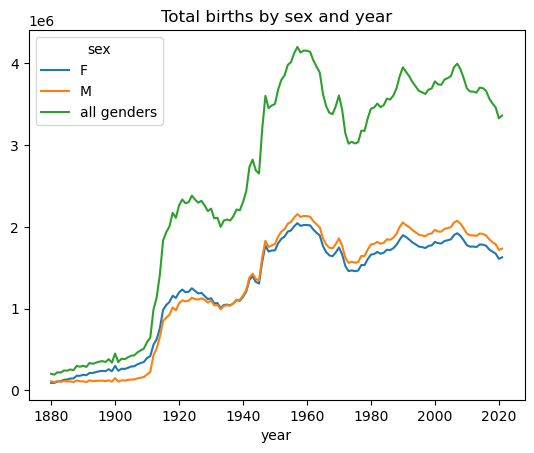

In [11]:
total_births.plot(title='Total births by sex and year')


In [13]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000


#another solution

#pieces=[]
#for year,group in names.groupby(['year', 'sex']):
#    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
#top1000=pd.concat(pieces,ignore_index=True)  
#top1000


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2021 M   2039783        Zev   M     218  2021  0.000126
         2039789     Harris   M     217  2021  0.000125
         2039793     Ronnie   M     217  2021  0.000125
         2039792    Merrick   M     217  2021  0.000125
         2039791     Mayson   M     217  2021  0.000125

[283876 rows x 5 columns]

In [14]:
boys=top1000[top1000.sex=='M']
boys

name sex  births  year      prop
year sex                                             
1880 M   942         John   M    9655  1880  0.087383
         943      William   M    9532  1880  0.086270
         944        James   M    5927  1880  0.053643
         945      Charles   M    5348  1880  0.048403
         946       George   M    5126  1880  0.046393
...                   ...  ..     ...   ...       ...
2021 M   2039783      Zev   M     218  2021  0.000126
         2039789   Harris   M     217  2021  0.000125
         2039793   Ronnie   M     217  2021  0.000125
         2039792  Merrick   M     217  2021  0.000125
         2039791   Mayson   M     217  2021  0.000125

[141996 rows x 5 columns]

In [15]:
girls=top1000[top1000.sex=='F']
girls

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2021 F   2022242     Soleil   F     255  2021  0.000157
         2022241     Sandra   F     255  2021  0.000157
         2022240   Eleanora   F     255  2021  0.000157
         2022239      Aarya   F     255  2021  0.000157
         2022243  Annabella   F     254  2021  0.000156

[141880 rows x 5 columns]

In [17]:
top1000.drop('year', inplace=True, axis=1)
total_births = top1000.pivot_table('births',index='year', columns='name',aggfunc=sum)
total_births


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4185.0,NaN,526.0,NaN,7211.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,NaN,5982.0,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3654.0,NaN,419.0,NaN,5529.0,NaN,NaN,NaN,...,265.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

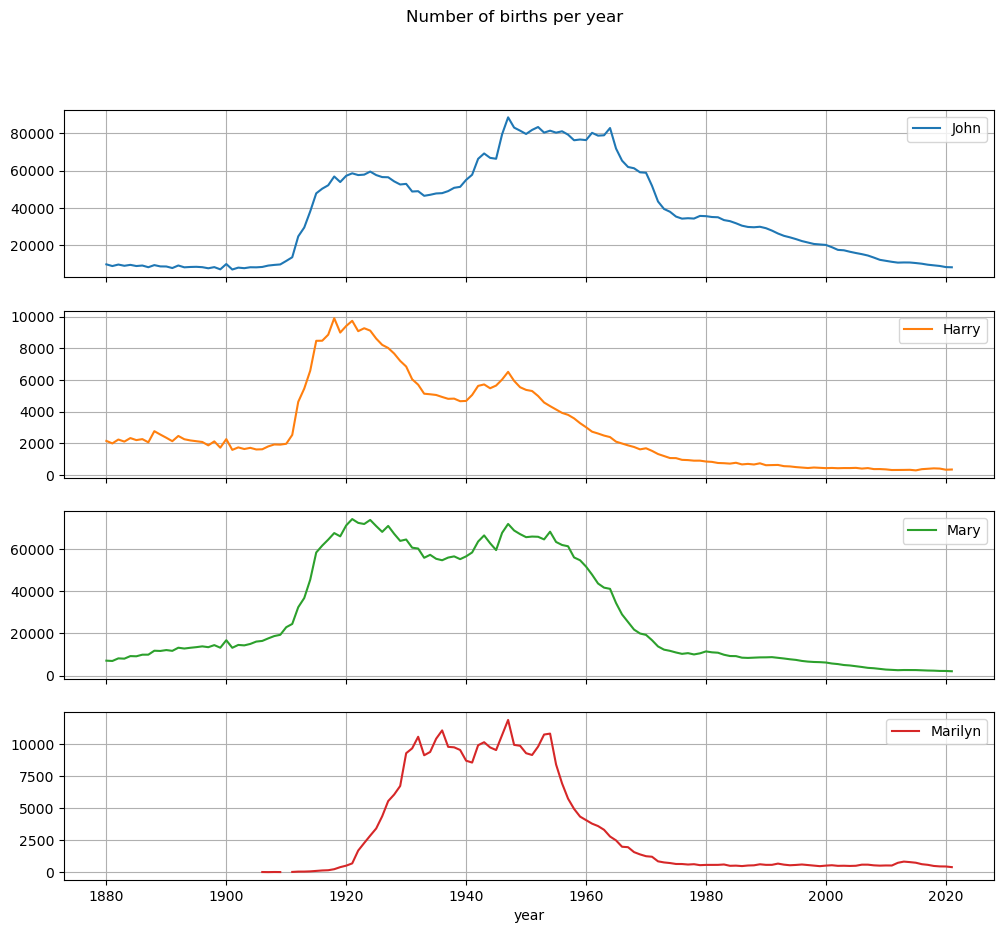

In [18]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=True,title="Number of births per year")


In [19]:
top1000.drop('sex', inplace=True, axis=1)
table_prop=top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table_prop

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2017,0.740749,0.833604
2018,0.741476,0.829455
2019,0.739543,0.825452


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

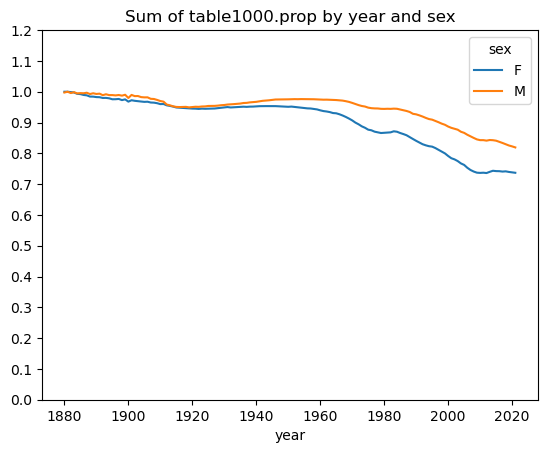

In [20]:
table_prop.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2021, 20))

In [29]:
year_2021_boys=boys[boys.year==2021]
year_2021_boys
#year_2021_boys.drop('year',inplace=True,axis=1)
#year_2021_boys.drop('sex',inplace=True,axis=1)
#year_2021=year_2021_boys.pivot_table('births',index='year',columns='sex',aggfunc=sum)
#year_2021

name sex  births  year      prop
year sex                                             
2021 M   2038788     Liam   M   20272  2021  0.011689
         2038789     Noah   M   18739  2021  0.010805
         2038790   Oliver   M   14616  2021  0.008428
         2038791   Elijah   M   12708  2021  0.007328
         2038792    James   M   12367  2021  0.007131
...                   ...  ..     ...   ...       ...
         2039783      Zev   M     218  2021  0.000126
         2039789   Harris   M     217  2021  0.000125
         2039793   Ronnie   M     217  2021  0.000125
         2039792  Merrick   M     217  2021  0.000125
         2039791   Mayson   M     217  2021  0.000125

[1000 rows x 5 columns]

In [30]:
prop_cumsum=year_2021_boys.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2021  M    2038788    0.011689
           2038789    0.022494
           2038790    0.030922
           2038791    0.038249
           2038792    0.045380
           2038793    0.052350
           2038794    0.059149
           2038795    0.065781
           2038796    0.072300
           2038797    0.077798
Name: prop, dtype: float64

In [31]:
prop_cumsum.searchsorted(0.5)+1

167

In [32]:
year_1900_boys=boys[boys.year==1900]
year_1900_boys

name sex  births  year      prop
year sex                                             
1900 M   54488       John   M    9829  1900  0.065319
         54489    William   M    8579  1900  0.057012
         54490      James   M    7245  1900  0.048147
         54491     George   M    5403  1900  0.035906
         54492    Charles   M    4098  1900  0.027233
...                   ...  ..     ...   ...       ...
         55531     Theron   M       8  1900  0.000053
         55530    Terrell   M       8  1900  0.000053
         55529  Stonewall   M       8  1900  0.000053
         55528      Solon   M       8  1900  0.000053
         55527   Sinclair   M       8  1900  0.000053

[1000 rows x 5 columns]

In [33]:
prop_cumsum=year_1900_boys.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex       
1900  M    54488    0.065319
           54489    0.122331
           54490    0.170478
           54491    0.206384
           54492    0.233617
           54493    0.259010
           54494    0.283691
           54495    0.306798
           54496    0.324874
           54497    0.342192
Name: prop, dtype: float64

In [34]:
prop_cumsum.searchsorted(0.5)+1

25

In [35]:
def common_names(group):
    group=group.sort_values(by='prop',ascending=True)
    return group.prop.cumsum().searchsorted(0.5)+1
diversity=top1000.groupby(['year','sex']).apply(common_names)
diversity=diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,905,988
1881,901,983
1882,963,987
1883,962,987
1884,963,986
...,...,...
2017,947,936
2018,945,934
2019,945,933


In [36]:
diversity.head()
#diversity[:5]

sex,F,M
year,,
1880,905,988
1881,901,983
1882,963,987
1883,962,987
1884,963,986


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

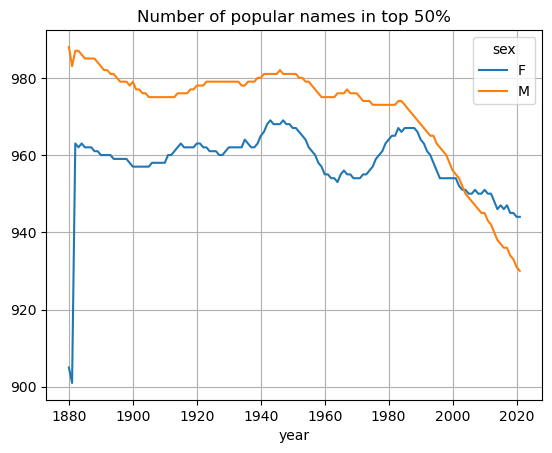

In [37]:
diversity.plot(title="Number of popular names in top 50%",grid=True)


In [39]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
2052776    e
2052777    l
2052778    n
2052779    r
2052780    n
Name: last_letter, Length: 2052781, dtype: object

In [40]:
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2012      2013      2014   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27227.0   27473.0   28318.0   
b                NaN      NaN      NaN  ...   34745.0   33278.0   31410.0   
c                NaN      NaN      NaN  ...   24293.0   24090.0   23847.0   
d             1027.0   1298.0   1374.0  ...   42520.0   42719.0   44077.0   
e            54353.0  66748.0  66662.0  ...  128591.0  132323.0  132195.0   
f                NaN      NaN      NaN  ...    2482.0    2593.0    2882.0   
g               25.0     44.0     28.0  ...    3807.0    4430.0    4724.0   
h             7141.0   8630.0   8825.0  ...   99135.0  100022.0  102156.0   
i              105.0    141.0    134.0  ...   47156.0   45456.0   46634.0   
j                NaN      NaN      NaN  ...    1500.0    1405.0    1360.0   
k               19.0     21.0     22.0  ...   34141.0   34887.0   35794.0   
l             6174.0   7900.0   8395.0  ...  129078.0  126884.0  127612.0   
m               90.0    123.0    137.0  ...   55109.0   57108.0   58765.0   
n             5512.0   6832.0   7103.0  ...  682713.0  669666.0  673646.0   
o               97.0    134.0    142.0  ...   78259.0   79519.0   82402.0   
p                NaN      NaN      NaN  ...    2527.0    2598.0    2524.0   
q                NaN      NaN      NaN  ...     337.0     336.0     312.0   
r              910.0   1207.0   1214.0  ...  167657.0  170458.0  178236.0   
s             2803.0   3581.0   3569.0  ...  122072.0  123889.0  128272.0   
t             3140.0   3816.0   3784.0  ...

In [41]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()
#subtable[:5]

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [42]:
subtable_sum=subtable.sum()
subtable_sum

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

In [43]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e            0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h            0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i            0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l            0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m            0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n            0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o            0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s            0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t            0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

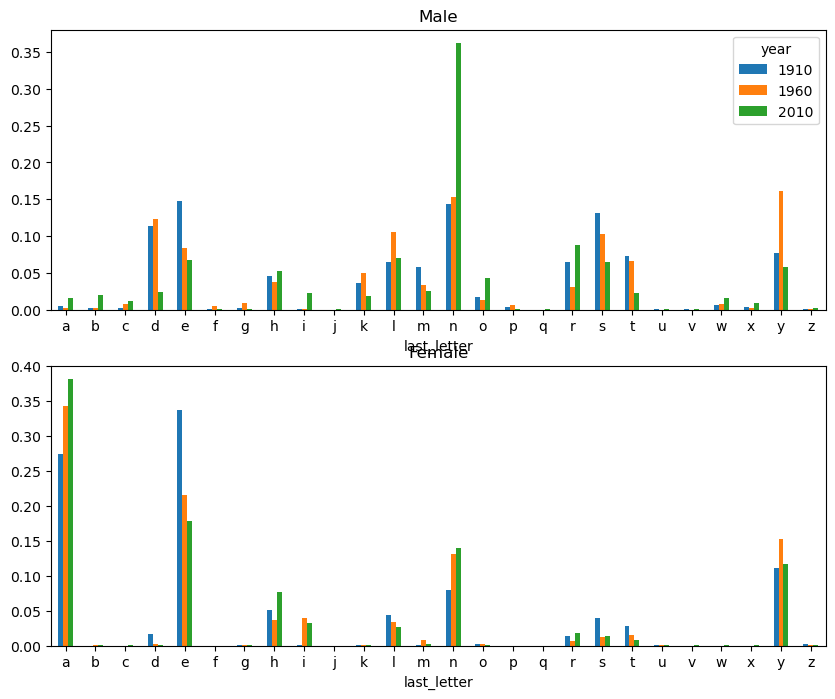

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
print()
print()
print()
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)


In [47]:
letter_prop = table / table.sum().astype(float)
letters=letter_prop.loc[['d', 'n', 'y'], 'M'].T
letters                          

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408
...,...,...,...
2017,0.022814,0.337869,0.049943
2018,0.023099,0.333495,0.048818
2019,0.022798,0.323742,0.048081


In [48]:
letters.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

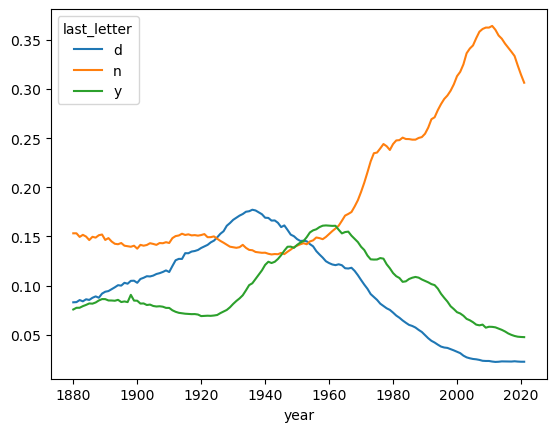

In [49]:
letters.plot()

In [50]:
unique_names=top1000.name.unique()
mask_names=np.array(['lesl' in x.lower()  for x in unique_names])
lesl_like=unique_names[mask_names]
lesl_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [55]:
filtered = top1000[top1000.name.isin(lesl_like)]
filtered.groupby('name').births.sum()
#filter_1=filtered.pivot_table('births',index=filtered.name,aggfunc=sum)
#filter_1

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: births, dtype: int64

In [62]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table.tail()
#table[::-1][:5][::-1]

sex,F,M
year,,
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN


<AxesSubplot:xlabel='year'>

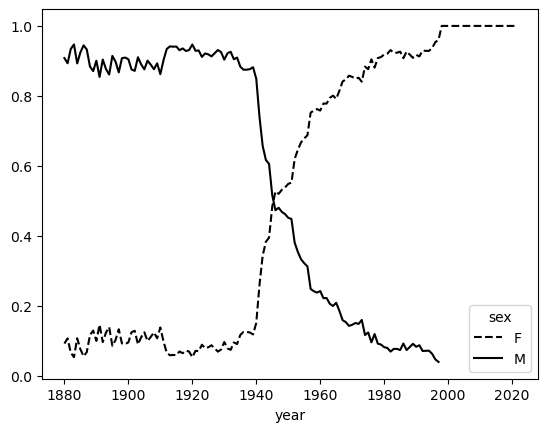

In [63]:
table.plot(style={'M': 'k-', 'F': 'k--'})